<a href="https://colab.research.google.com/github/Ehtisham1053/Regression-ML-Algorithms/blob/main/Random_forest_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

class ManualRandomForestRegressor:
    def __init__(self, n_estimators=50, max_depth=None, max_features='sqrt', random_state=42):
        self.n_estimators = n_estimators
        self.max_depth = max_depth
        self.max_features = max_features
        self.random_state = random_state
        self.trees = []
        self.subsets = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        n_samples = X.shape[0]

        for _ in range(self.n_estimators):
            # Bootstrap Sampling (Random Sampling with Replacement)
            indices = np.random.choice(n_samples, n_samples, replace=True)
            X_subset, y_subset = X[indices], y[indices]

            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X_subset, y_subset)

            self.trees.append(tree)
            self.subsets.append(indices)

    def predict(self, X):
        # Aggregate Predictions from all Trees (Bagging)
        predictions = np.zeros((self.n_estimators, X.shape[0]))

        for i, tree in enumerate(self.trees):
            predictions[i] = tree.predict(X)

        return np.mean(predictions, axis=0)

    def evaluate(self, X_train, y_train, X_test, y_test):
        y_train_pred = self.predict(X_train)
        y_test_pred = self.predict(X_test)

        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        print("Train MSE:", train_mse)
        print("Test MSE:", test_mse)
        print("Train MAE:", train_mae)
        print("Test MAE:", test_mae)
        print("Train R² Score:", train_r2)
        print("Test R² Score:", test_r2)

        return train_mse, test_mse, train_mae, test_mae, train_r2, test_r2

    def plot_decision_boundary(self, X, y):
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)
        xx, yy = np.meshgrid(np.linspace(X_pca[:,0].min()-1, X_pca[:,0].max()+1, 100),
                             np.linspace(X_pca[:,1].min()-1, X_pca[:,1].max()+1, 100))
        Z = self.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(8,6))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
        plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='coolwarm', edgecolor='k')
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.title("Decision Boundary of Random Forest Regressor")
        plt.colorbar()
        plt.show()



In [2]:
data = sns.load_dataset("penguins").dropna()
X = data.drop(columns=['species']).select_dtypes(include=[np.number]).values
y = data['bill_length_mm'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train MSE: 0.018594015497171833
Test MSE: 0.05217586090459472
Train MAE: 0.07551922978432747
Test MAE: 0.10947578412630161
Train R² Score: 0.9993611028305384
Test R² Score: 0.9983900534459658


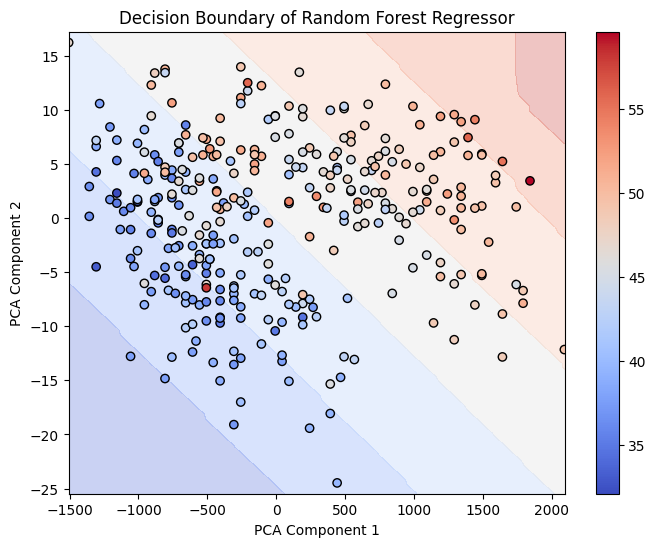

In [3]:
rf_regressor = ManualRandomForestRegressor(n_estimators=50, max_depth=5, random_state=42)
rf_regressor.fit(X_train, y_train)
rf_regressor.evaluate(X_train, y_train, X_test, y_test)
rf_regressor.plot_decision_boundary(X, y)

# Random Forest Regression - Explanation

## 1️⃣ Introduction
Random Forest Regression is an **ensemble learning method** that builds multiple decision trees and **averages their outputs** to improve accuracy and reduce overfitting.

## 2️⃣ Why Use Random Forest Regression?
- ✅ Handles **non-linear relationships** in data.
- ✅ **Reduces overfitting** compared to a single Decision Tree.
- ✅ **Improves accuracy** through multiple tree predictions.
- ✅ **Robust to noise** and missing data.

---

## 3️⃣ Manual Implementation of Random Forest Regression

### How the Manual Implementation Works:
1. **Bootstrap Sampling**:  
   - Create random subsets of data **with replacement**.
2. **Train Multiple Decision Trees**:  
   - Each tree is trained on a different **random subset**.
3. **Aggregate Predictions**:  
   - The final prediction is the **average output** of all trees.
4. **Evaluation Metrics**:
   - **Mean Squared Error (MSE)** → Measures the squared difference between actual and predicted values.
   - **Mean Absolute Error (MAE)** → Measures the absolute difference between predictions and actual values.
   - **R² Score** → Measures how well the model explains variance in the data.
5. **Decision Boundary Plotting**:
   - **PCA (Principal Component Analysis)** is used to reduce features to **2D for visualization**.
   - The **decision boundary** shows how the model predicts different values in the feature space.

---

## 4️⃣ Implementation Using `sklearn`

### How `RandomForestRegressor` Works:
Instead of manually implementing trees, we use `RandomForestRegressor` from `sklearn.ensemble`:

- ✅ **Automatically** handles bootstrap sampling and aggregation.
- ✅ Provides **hyperparameter tuning** for better performance.
- ✅ Optimized for **speed and efficiency**.

### Key Parameters in `RandomForestRegressor`:
- `n_estimators` → Number of trees in the forest.
- `max_depth` → Maximum depth of each tree.
- `max_features` → Number of features used for each split.
- `random_state` → Ensures **reproducibility** of results.

---

## 5️⃣ Comparison: Manual vs `sklearn` Implementation

| Feature  | Manual Implementation | `sklearn` Implementation |
|----------|----------------------|-------------------------|
| Tree Creation | Explicitly built Decision Trees | Handled internally |
| Bootstrap Sampling | Manually implemented | Built-in |
| Prediction Aggregation | Average of tree predictions | Built-in |
| Hyperparameter Tuning | Manual tuning required | `GridSearchCV` available |
| Speed & Efficiency | Slower | Optimized |

---

## 6️⃣ Where to Use Random Forest Regression?
- ✅ **Financial Forecasting** – Stock price prediction, risk analysis.
- ✅ **Medical Applications** – Disease risk prediction.
- ✅ **Marketing & Sales** – Customer behavior prediction.
- ✅ **Engineering** – Predicting material properties.

---



# ✅ Random Forest Regression (OOP) using sklearn

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.decomposition import PCA

class RandomForestRegressionModel:
    def __init__(self, n_estimators=50, max_depth=5, max_features='sqrt', random_state=42):
        self.model = RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth,
                                           max_features=max_features, random_state=random_state)

    def fit(self, X_train, y_train):
        self.model.fit(X_train, y_train)

    def predict(self, X):
        return self.model.predict(X)

    def evaluate(self, X_train, y_train, X_test, y_test):
        y_train_pred = self.predict(X_train)
        y_test_pred = self.predict(X_test)

        train_mse = mean_squared_error(y_train, y_train_pred)
        test_mse = mean_squared_error(y_test, y_test_pred)
        train_mae = mean_absolute_error(y_train, y_train_pred)
        test_mae = mean_absolute_error(y_test, y_test_pred)
        train_r2 = r2_score(y_train, y_train_pred)
        test_r2 = r2_score(y_test, y_test_pred)

        print(f"📊 Regression Metrics:")
        print(f"🔹 Train MSE: {train_mse:.4f} | Test MSE: {test_mse:.4f}")
        print(f"🔹 Train MAE: {train_mae:.4f} | Test MAE: {test_mae:.4f}")
        print(f"🔹 Train R² Score: {train_r2:.4f} | Test R² Score: {test_r2:.4f}")

        return train_mse, test_mse, train_mae, test_mae, train_r2, test_r2

    def plot_decision_boundary(self, X, y):
        """Plot the decision boundary using PCA (2D Visualization)."""
        pca = PCA(n_components=2)
        X_pca = pca.fit_transform(X)

        xx, yy = np.meshgrid(np.linspace(X_pca[:,0].min()-1, X_pca[:,0].max()+1, 100),
                             np.linspace(X_pca[:,1].min()-1, X_pca[:,1].max()+1, 100))

        Z = self.predict(pca.inverse_transform(np.c_[xx.ravel(), yy.ravel()]))
        Z = Z.reshape(xx.shape)

        plt.figure(figsize=(8,6))
        plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
        sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=y, palette='coolwarm', edgecolor='k')
        plt.xlabel("PCA Component 1")
        plt.ylabel("PCA Component 2")
        plt.title("Decision Boundary of Random Forest Regression")
        plt.show()




📊 Regression Metrics:
🔹 Train MSE: 0.0093 | Test MSE: 0.0101
🔹 Train MAE: 0.0401 | Test MAE: 0.0483
🔹 Train R² Score: 0.9882 | Test R² Score: 0.9872


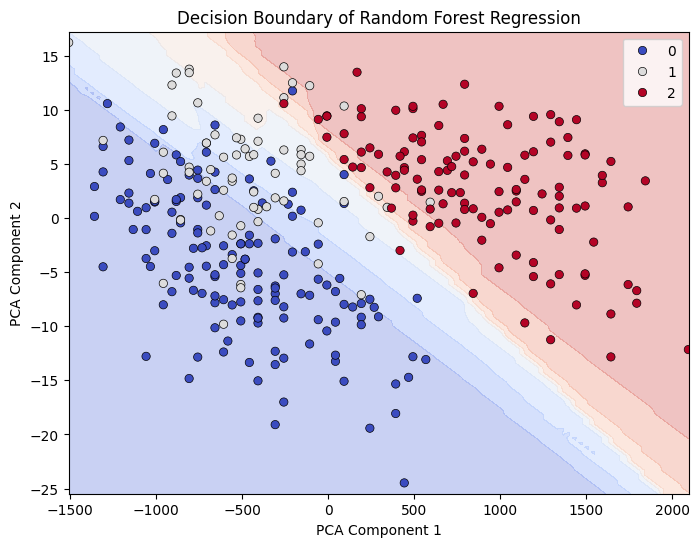

In [10]:
data = sns.load_dataset("penguins").dropna()
X = data.drop(columns=['species']).select_dtypes(include=[np.number]).values
y = data['species'].astype('category').cat.codes.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressionModel(n_estimators=50, max_depth=5, max_features='sqrt', random_state=42)
rf_regressor.fit(X_train, y_train)
rf_regressor.evaluate(X_train, y_train, X_test, y_test)
rf_regressor.plot_decision_boundary(X, y)

# 🌲 Random Forest Regression: A Comprehensive Explanation

## 🔹 What is Random Forest Regression?
Random Forest Regression is an **ensemble learning technique** that builds multiple **decision trees** and averages their predictions to produce a more **robust, stable, and accurate** result. It is a **non-linear** regression model and is widely used for handling **complex relationships** in data.

---

## 🔹 How Does Random Forest Regression Work?
The working of **Random Forest Regression** can be understood in the following steps:

1. **Dataset Bootstrapping**  
   - The algorithm selects **random subsets** of data points from the original dataset (with replacement).
   - Each subset is used to train a separate **Decision Tree Regressor**.

2. **Feature Selection**  
   - At each split in a decision tree, a **random subset of features** is chosen.
   - The best feature is selected from this subset to split the node.

3. **Tree Growth**  
   - Each decision tree is grown **independently** to a certain depth.
   - No pruning is done, and trees can be **fully grown** or have a set `max_depth`.

4. **Prediction Aggregation**  
   - For **regression**, each tree provides a numerical prediction.
   - The final prediction is computed by taking the **average** of all tree outputs.

---

## 🔹 Why Does Random Forest Regression Work?
Random Forest Regression works effectively because of the following reasons:

✅ **Reduces Overfitting**: Since multiple trees are trained on different random subsets of data, the model generalizes well and does not overfit like a single decision tree.

✅ **Handles Missing Data**: Random Forest can still make reliable predictions even if some data is missing, as different trees handle different parts of the data.

✅ **Works Well with High-Dimensional Data**: Since it selects random features at each split, it can handle large datasets with many features efficiently.

✅ **Captures Non-Linear Relationships**: Unlike simple linear regression, Random Forest can learn complex, non-linear patterns in the data.

✅ **Robust to Noisy Data**: Since it takes the average prediction of multiple trees, the impact of noise is reduced.

---

## 🔹 Where to Use Random Forest Regression?
Random Forest Regression is widely used in various real-world applications, including:

📌 **Stock Price Prediction**:
